In [1]:
import numpy as np
from scipy.integrate import solve_bvp
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
pi = math.pi

## Problem 2

In [2]:
# Defining matrices & constants
N = 100
Q = np.array([[2, 0],[0, 0.01]])
R = np.array([[0.1]])
Rinv = 1/R
P1 = np.array([[1, 0], [0, 0.01]])
A = np.array([[0, 1], [-1.6, -0.4]])
B = np.array([[0, 1]]).T
x0 = np.array([10, 0])
y0 = np.ones([4, 100])
t = np.linspace(0, 10, num = N)

In [3]:
# Defining functions for solve_bvp
def f(t, y): # takes in y = [x, p].T, and returns dy/dt = [xdot, pdot].T
    xdot = np.matmul(A, y[0:2]) - np.matmul(B,np.matmul(Rinv, np.matmul(B.T, y[2:4])))
    #A@y[0:2]- B@Rinv@B.T@y[2:4] 
    #pdot = A.T@y[2:4] - Q@y[0:2]
    pdot = np.matmul(-A.T, y[2:4]) - np.matmul(Q, y[0:2])
    #print(np.vstack((xdot, pdot)).shape)
    return np.vstack((xdot, pdot))

def bc(ya, yb): # boundary conditions
    bc1 = ya[0:2] - x0.T
    #bc2 = yb[2:4]-P1.T@yb[0:2]
    bc2 = yb[2:4] - np.matmul(P1.T, yb[0:2])
    return np.hstack((bc1, bc2))

results = solve_bvp(f,bc,t,y0)

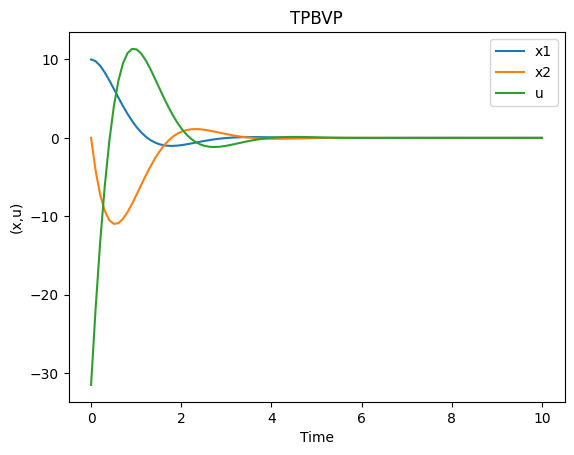

In [4]:
x1 = (results.y)[0].flatten()
x2 = (results.y)[1].flatten()
p = (results.y)[2:4]

u = (-Rinv@B.T@p).T.flatten()
newt = results.x

plt.plot(newt, x1, label = 'x1')
plt.plot(newt, x2, label = 'x2')
plt.plot(newt, u, label= 'u')
plt.title('TPBVP')
plt.xlabel('Time')
plt.ylabel('(x,u)')
plt.legend()

In [18]:
# Peturbation Matrices
# Random peturbation in v of the format Asin(Bt+C) + D
Aperturbs = np.zeros(10)
Bperturbs = np.zeros(10)
Cperturbs = np.zeros(10)
Dperturbs = np.zeros(10)
v = np.zeros((10, len(newt)))

for i in range(10):
    Aperturbs[i] = np.random.rand()
    Bperturbs[i] = np.random.rand()
    Cperturbs[i] = np.random.rand()
    Dperturbs[i] = np.random.rand()
    v[i,:] = Aperturbs[i] * np.sin(newt * Bperturbs[i] + Cperturbs[i]) + Dperturbs[i]

print(np.around(Aperturbs, 2))
print(np.around(Bperturbs, 2))
print(np.around(Cperturbs, 2))
print(np.around(Dperturbs, 2))

[0.41 0.5  0.48 0.31 0.65 0.46 0.06 0.17 0.6  0.87]
[0.95 0.36 0.33 0.39 0.29 1.   0.18 0.19 0.57 0.39]
[0.76 0.34 0.89 0.88 0.77 0.15 0.98 0.64 0.65 0.27]
[0.98 0.39 0.89 0.69 0.63 0.98 0.59 0.36 0.25 0.4 ]


In [19]:
# Solving for z matrix
z1 = np.zeros([2,N])
z2 = np.zeros([2,N])
z3 = np.zeros([2,N])
z4 = np.zeros([2,N])
z5 = np.zeros([2,N])
z6 = np.zeros([2,N])
z7 = np.zeros([2,N])
z8 = np.zeros([2,N])
z9 = np.zeros([2,N])
z10 = np.zeros([2,N])

for i in range(N-1):
    z1dot = (A@z1[:,i]).T + (B*v[0][i]).T
    z2dot = (A@z2[:,i]).T + (B*v[1][i]).T
    z3dot = (A@z3[:,i]).T + (B*v[2][i]).T
    z4dot = (A@z4[:,i]).T + (B*v[3][i]).T
    z5dot = (A@z5[:,i]).T + (B*v[4][i]).T
    z6dot = (A@z6[:,i]).T + (B*v[5][i]).T
    z7dot = (A@z7[:,i]).T + (B*v[6][i]).T
    z8dot = (A@z8[:,i]).T + (B*v[7][i]).T
    z9dot = (A@z9[:,i]).T + (B*v[8][i]).T
    z10dot = (A@z10[:,i]).T + (B*v[9][i]).T

    z1[:,i+1] = z1[:,i] + newt[1]*z1dot
    z2[:,i+1] = z2[:,i] + newt[1]*z2dot
    z3[:,i+1] = z3[:,i] + newt[1]*z3dot
    z4[:,i+1] = z4[:,i] + newt[1]*z4dot
    z5[:,i+1] = z5[:,i] + newt[1]*z5dot
    z6[:,i+1] = z6[:,i] + newt[1]*z6dot
    z7[:,i+1] = z7[:,i] + newt[1]*z7dot
    z8[:,i+1] = z8[:,i] + newt[1]*z8dot
    z9[:,i+1] = z9[:,i] + newt[1]*z9dot
    z10[:,i+1] = z10[:,i] + newt[1]*z10dot

z = np.vstack((z1, z2, z3, z4, z5, z6, z7, z8, z9, z10))


In [21]:
# Solving directional derivative
x = np.vstack((x1, x2))

totalsum = 0
for i in range(N):
    temp_sum = x[:,i].T@Q@z1[:,i] + z1[:,i].T@Q@x[:,i] + u[i]*R*v[0][i]+v[0][i]*R*u[i]
    totalsum = totalsum + temp_sum*newt[1]
fv = x[:,N-1].T@P1@z1[:,N-1] + z1[:,N-1].T@P1@x[:,N-1]
dir_deriv = 0.5*totalsum + 0.5*fv
print(dir_deriv/10)



[[-0.05842582]]


In [23]:
totalsum = 0
for i in range(N):
    temp_sum = x[:,i].T@Q@z2[:,i] + z2[:,i].T@Q@x[:,i] + u[i]*R*v[1][i]+v[1][i]*R*u[i]
    totalsum = totalsum + temp_sum*newt[1]
fv = x[:,N-1].T@P1@z2[:,N-1] + z2[:,N-1].T@P1@x[:,N-1]
dir_deriv = 0.5*totalsum + 0.5*fv
print(dir_deriv/10)

[[-0.02464937]]


In [31]:
totalsum = 0
for i in range(N):
    temp_sum = x[:,i].T@Q@z10[:,i] + z10[:,i].T@Q@x[:,i] + u[i]*R*v[9][i]+v[9][i]*R*u[i]
    totalsum = totalsum + temp_sum*newt[1]
fv = x[:,N-1].T@P1@z10[:,N-1] + z10[:,N-1].T@P1@x[:,N-1]
dir_deriv = 0.5*totalsum + 0.5*fv
print(dir_deriv/10)

[[-0.0282442]]


## Problem 3

In [11]:
def Pdot(P): # given initial P(t) return Pdot(t)
    return -P@A - A.T@P + P@B@Rinv@B.T@P - Q

def integrate(f, xt, dt): 
    """
    This function takes in an initial condition x(t) and a timestep dt, as well as a dynamical system f(x) that outputs a vector of the same dimension as x(t). It outputs a vector x(t+dt) at the future time step.
    Parameters ============
    dyn: Python function
    derivate of the system at a given step x(t),
    it can considered as \dot{x}(t) = func(x(t)) xt: NumPy array
    current step x(t) dt:
    step size for integration
    Return ============ new_xt:
    value of x(t+dt) integrated from x(t) 
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4) 
    return new_xt

def integrate2(f, xt, pt, dt): 
    k1 = dt * f(xt, pt)
    k2 = dt * f(xt+k1/2.,pt)
    k3 = dt * f(xt+k2/2., pt)
    k4 = dt * f(xt+k3,pt)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4) 
    return new_xt

In [12]:
# Creating list of P values integrating backward from Pdot
Plist = list()
Plist.append(P1) # initial Pdot
for i in range(N-1):
    newP = integrate(Pdot, Plist[i], -newt[1])
    Plist.append(newP)
Plist.reverse() # reversing list to be increments in time
print(Plist)


[array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.31497368, 0.21611469]]), array([[1.1524774 , 0.31497368],
       [0.3149

In [13]:
def xdot(x, P): # given initial x, P return xdot
    return A@x - B@Rinv@B.T@P@x

ric_x = np.zeros([2,100])
ric_x[:,0] = x0

for i in range(N-1):
    newx = integrate2(xdot, ric_x[:,i], Plist[i], newt[1])
    if (i == 0):
        print(newx)
    ric_x[:,i+1] = newx

dif_x1 = x1 - ric_x[0]
dif_x2 = x2 - ric_x[1]

ric_u = np.zeros([1, 100])
for i in range(N):
    ric_u[0][i] = -Rinv@B.T@Plist[i]@ric_x[:,i]

dif_u = u - ric_u.flatten()
print(xdot(x0, P1))




[ 9.7782136 -4.1934417]
[  0. -16.]


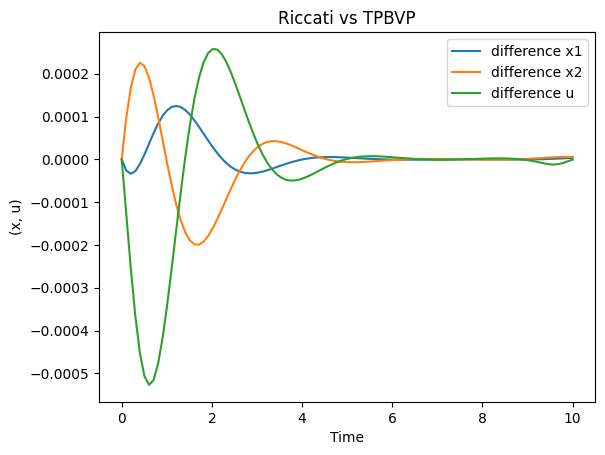

In [14]:
plt.plot(newt, dif_x1, label = 'difference x1')
plt.plot(newt, dif_x2, label = 'difference x2')
plt.plot(newt, dif_u, label= 'difference u')
plt.title('Riccati vs TPBVP')
plt.xlabel('Time')
plt.ylabel('(x, u)')
plt.legend()

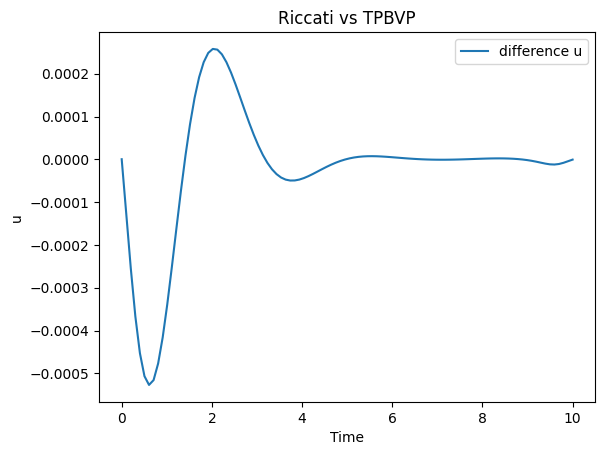

In [15]:
plt.plot(newt, dif_u, label = 'difference u')
plt.title('Riccati vs TPBVP')
plt.xlabel('Time')
plt.ylabel('u')
plt.legend()

In [255]:
print(ric_x[0])

[ 1.00000000e+01  9.77821360e+00  9.19111606e+00  8.34694765e+00
  7.34020894e+00  6.25077361e+00  5.14382554e+00  4.07043508e+00
  3.06860410e+00  2.16462869e+00  1.37464908e+00  7.06278170e-01
  1.60221543e-01 -2.68178079e-01 -5.87520304e-01 -8.09082695e-01
 -9.45730713e-01 -1.01100859e+00 -1.01840858e+00 -9.80808959e-01
 -9.10066312e-01 -8.16744118e-01 -7.09958268e-01 -5.97319336e-01
 -4.84952027e-01 -3.77573394e-01 -2.78613094e-01 -1.90360974e-01
 -1.14129506e-01 -5.04207501e-02  9.10263850e-04  4.05018855e-02
  6.93462303e-02  8.86663460e-02  9.98115564e-02  1.04171291e-01
  1.03106849e-01  9.78999190e-02  8.97162130e-02  7.95823259e-02
  6.83737858e-02  5.68122529e-02  4.54699010e-02  3.47791573e-02
  2.50461665e-02  1.64665558e-02  9.14230677e-03  3.09876444e-03
 -1.69897173e-03 -5.33083084e-03 -7.90810700e-03 -9.56157652e-03
 -1.04314950e-02 -1.06594717e-02 -1.03821379e-02 -9.72647101e-03
 -8.80659471e-03 -7.72185505e-03 -6.55596386e-03 -5.37700223e-03
 -4.23808799e-03 -3.17852